<a href="https://colab.research.google.com/github/kahumawalter/Price-Prediction/blob/main/Project_2_part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

path = '/content/drive/MyDrive/Coding Dojo/Week 7/Diamonds Prices2022.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.
About the currency for the price column: it is Price ($)
And About the columns x,y, and z they are diamond measurements as (( x: length in mm, y: width in mm,z: depth in mm ))

In [56]:
# The unnamed column is unnecessary so I decided to drop it.

diamond_df = df.drop(columns=['Unnamed: 0'])
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [57]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [58]:
#Checking to see if there any difficult values
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [59]:
#The data has no missing values. 
diamond_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [61]:
#creating a sample dataset of 1000 data points to avoid overplotting
df_sample = diamond_df.sample(1000)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


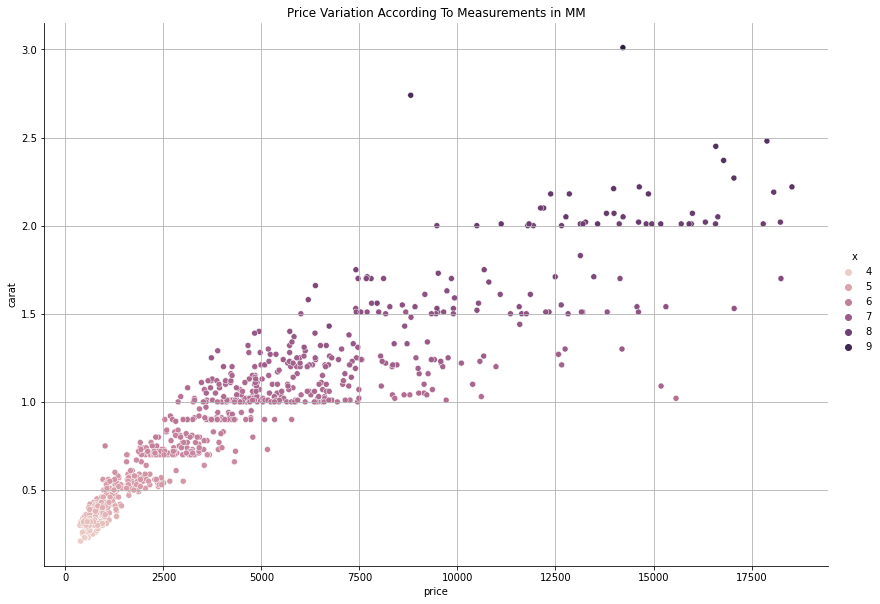

In [62]:
sns.relplot(df_sample['price'], df_sample['carat'],hue= df_sample['x'], height=8.27, aspect=11.7/8.27).set(title='Price Variation According To Measurements in MM');
plt.grid()


According to the scatter plot which sampled 1000 data points, the more the carats the higher the price of the diamonds. However there are some outliers where the carats were roughly high as 1.6 but were valued at 5500. There were also times when the carat was relatively low at 1.3 but the diamond was valued at 15,000USD.

The scatter plot also shows us the length(x) of the diamond which varies in color. As the length of the diamond grows the more expensive the diamond turned out to be.

However there are some outliers where length was 8mm but the diamond price was roughly low at 7500 USD and when the length was 9mm (the highest) but the price was relatively low at about 10,500USD. While in some other situations the diamond length was 6mm but the price was relatively high at 15,000 USD.

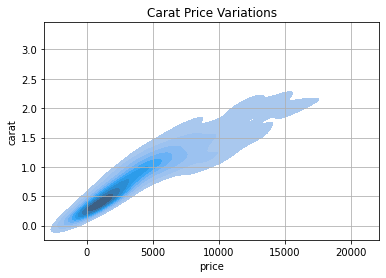

In [93]:
sns.kdeplot(x=df_sample["price"], y=df_sample["carat"],shade=True)
plt.title('Carat Price Variations')
plt.grid()
plt.show()

According to the density graph above, the majority of the diamonds in our sample data have 0.2 to 0.8 carats as shown by the dark contours and these range between 300 and 2500 USD. The graph also shows that the majority of the diamonds are less than 5000 USD. 

In [64]:
# Assigning the y (target) and X (features)
y = diamond_df['price']
X = diamond_df.drop(columns=['price'])

In [65]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer

In [67]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


In [68]:
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [69]:
# Numeric pipeline
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [70]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [71]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bc1380dd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bc13808d0>)])

In [72]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bc1380dd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8bc13808d0>)])

In [73]:
# Transform train and test

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [75]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [76]:
#Fitting the decision tree regressor on the data
dec_tree.fit(X_train_processed,y_train)

DecisionTreeRegressor(random_state=42)

In [77]:
# Evaluating the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)


0.9999949488443407
0.9647112302832495


In [78]:
# Looking at the depth of the default tree so I can tune the model

dec_tree.get_depth()

36

In [79]:
#Tuning the model to get a better test score 

dec_tree_2 = DecisionTreeRegressor(max_depth = 30, random_state = 42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

0.9999893186038741
0.9651505591170254


After tuning the model using a max depth of 30, we got a better performance on the test data which has a 96% accuracy. 

In [80]:
reg = LinearRegression()


In [81]:
#Fitting the linear regression on the processed data
reg.fit(X_train_processed,y_train)

LinearRegression()

In [82]:
#Creating model predictions

train_pred = reg.predict(X_train_processed)
test_pred = reg.predict(X_test_processed)

In [83]:
#Evaluating the model performance using R^2 on the training set and on the test set.

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.9189327339650293
Model Testing R2: 0.9222626557747929


Our model can predict about 92% of the variation in y_test using the features in X_test. 

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
#Using the Random Forest Regressor to make predictions to the data. 
rf = RandomForestRegressor(random_state = 42)


In [86]:
#Fitting the Random Forest Regressor on the model

rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [87]:
predictions = rf.predict(X_test_processed)

In [88]:
# Evaluating the model

rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(rf_train_score)
print(rf_test_score)


0.9973092756800016
0.9808739679739988


The model is able to predict 98% of the test data.  

In [89]:
#Tuning the model with max depth of 32 to get a better result on the testing data
rf_90 = RandomForestRegressor(max_depth = 32, random_state = 42)
rf_90.fit(X_train_processed, y_train)
rf_90_train_score = rf_90.score(X_train_processed, y_train)
rf_90_test_score = rf_90.score(X_test_processed, y_test)
print(rf_90_train_score)
print(rf_90_test_score)

0.997306600197919
0.980975016206233


After tuning the model to a max depth of 32, there was a slight improvement on the test score. It rose to 98.09%

In [90]:
#Seeing how the predictions compare to the original values. 

prediction_df = X_test.copy()
prediction_df['True Price'] = y_test
prediction_df['Predicted Price'] = predictions
prediction_df['Error'] = predictions - y_test
prediction_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,True Price,Predicted Price,Error
1388,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47,559,556.150000,-2.850000
19841,1.21,Very Good,F,VS2,62.9,54.0,6.78,6.82,4.28,8403,8348.010000,-54.990000
41647,0.50,Fair,E,SI1,61.7,68.0,5.09,5.03,3.12,1238,1248.946667,10.946667
41741,0.50,Ideal,D,SI2,62.8,56.0,5.06,5.03,3.17,1243,1200.675000,-42.325000
17244,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61,6901,9761.910000,2860.910000


Having used Linear Regression, Decision Tree Regressor and Random Forest Regressor to make predictions to the data, I would choose to go with Random Forest Regressor because it had a higher prediction rate of 98% as compared to the rest.  